## **Importing Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split


## **Loading CIFAR-10 Dataset**

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## **Splitting Dataset**

In [3]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

## **Normalize Pixel Values**

In [4]:
x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0

In [5]:
print(f"x_train shape: {x_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"x_test shape: {x_test.shape}")

x_train shape: (40000, 32, 32, 3)
x_val shape: (10000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


## **Visualize Some Images**

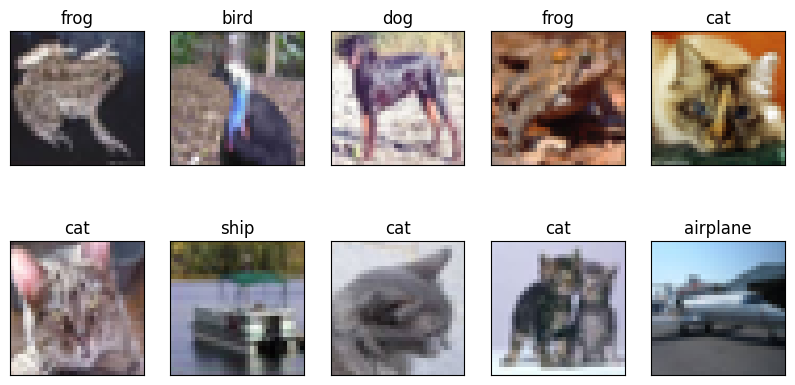

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
plt.show()

## **Data Augmentation**

In [7]:
# Data Augmentation to improve generalization
datagen = ImageDataGenerator(
    rotation_range=5,  # Reduced rotation
    width_shift_range=0.05,  # Reduced shift
    height_shift_range=0.05,
    horizontal_flip=True
)


datagen.fit(x_train)  # Compute data augmentation transformations on training set


## **Define the CNN Model**

In [8]:
# Defined an improved CNN architecture
model = Sequential([
    # First Conv Block
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    # Second Conv Block
    Conv2D(64, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    # Third Conv Block
    Conv2D(128, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.4),

    # Fully Connected Layers
    GlobalAveragePooling2D(),  # Better than Flatten
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 output classes
])


## **Compile the Model**

In [9]:
# Compile the model using SGD + Momentum
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        1

## **Model Training**

In [10]:
history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_val, y_val))


Epoch 1/30
625/625 [==============================] - 8s 8ms/step - loss: 1.6640 - accuracy: 0.3912 - val_loss: 1.4409 - val_accuracy: 0.4740
Epoch 2/30
625/625 [==============================] - 4s 7ms/step - loss: 1.2269 - accuracy: 0.5673 - val_loss: 1.1533 - val_accuracy: 0.5899
Epoch 3/30
625/625 [==============================] - 4s 7ms/step - loss: 1.0551 - accuracy: 0.6298 - val_loss: 1.2428 - val_accuracy: 0.5663
Epoch 4/30
625/625 [==============================] - 4s 7ms/step - loss: 0.9351 - accuracy: 0.6758 - val_loss: 1.0140 - val_accuracy: 0.6528
Epoch 5/30
625/625 [==============================] - 4s 7ms/step - loss: 0.8487 - accuracy: 0.7077 - val_loss: 0.8743 - val_accuracy: 0.7069
Epoch 6/30
625/625 [==============================] - 4s 7ms/step - loss: 0.7841 - accuracy: 0.7338 - val_loss: 0.7158 - val_accuracy: 0.7486
Epoch 7/30
625/625 [==============================] - 4s 7ms/step - loss: 0.7363 - accuracy: 0.7513 - val_loss: 0.7542 - val_accuracy: 0.7453
Epoch 

## **Model Evaluation on Test Data**

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


313/313 [==============================] - 1s 3ms/step - loss: 0.5776 - accuracy: 0.8182
Test Loss: 0.5775976777076721
Test Accuracy: 0.8181999921798706


## **Plot Training History**

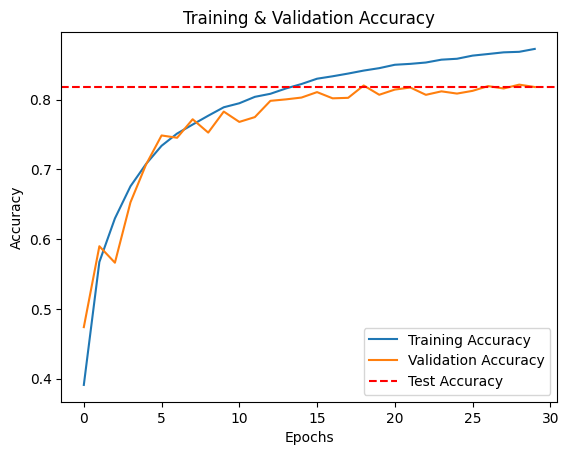

In [12]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_acc, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')
plt.show()


## **Prediction on Test Images**

313/313 [==============================] - 1s 2ms/step


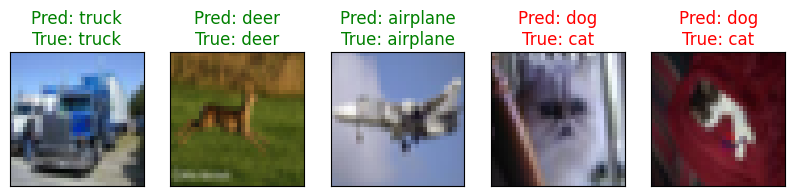

In [13]:
# Get model predictions
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = y_test.flatten()

# Find correct and incorrect predictions
correct_indices = np.where(predicted_labels == true_labels)[0]
incorrect_indices = np.where(predicted_labels != true_labels)[0]

# Select 3 correct and 2 incorrect predictions for visualization
correct_samples = np.random.choice(correct_indices, 3, replace=False)
incorrect_samples = np.random.choice(incorrect_indices, 2, replace=False)
sample_indices = np.concatenate((correct_samples, incorrect_samples))

# Plot images with predictions
plt.figure(figsize=(10, 5))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[idx])
    pred_label = class_names[predicted_labels[idx]]
    true_label = class_names[true_labels[idx]]
    color = "green" if pred_label == true_label else "red"
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)

plt.show()
